# Dissovle state boundaries

Using geopandas to take the Australian Remoteness Area boundaries (which are provided by state) and remove the state boundaries

A sample of the properties is:

```json
{
    "properties":{
        "RA_CODE16":"11"
        ,"RA_NAME16":"Inner Regional Australia"
        ,"STE_CODE16":"1"
        ,"STE_NAME16":"New South Wales"
        ,"AREASQKM16":87424.8418
    }
}
```


In [1]:
## Import libraries
import pandas as pd
import geopandas as gpd
import math
import matplotlib.pyplot as plt

In [2]:
## Read in the file
inputfile='./RA_2016_AUST-simple.geojson'
ra = gpd.read_file(inputfile)

<AxesSubplot:>

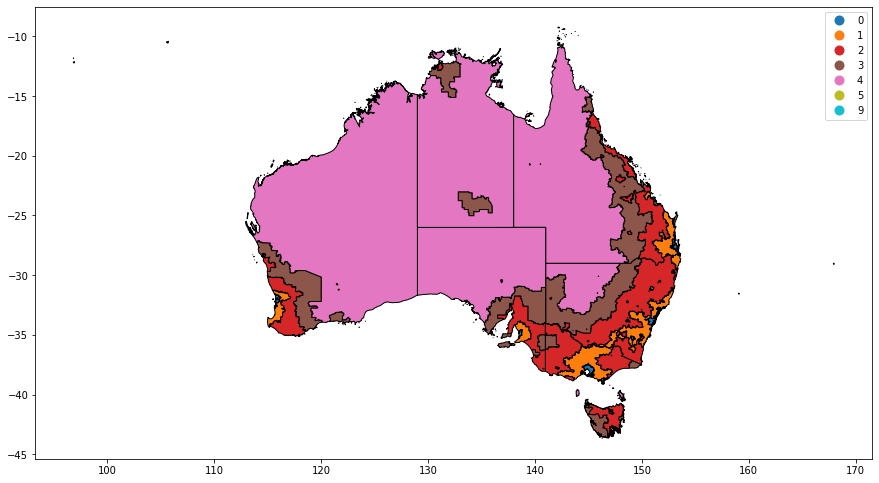

In [3]:
## plot the shape file on the map
ra['RA_CAT'] = pd.to_numeric(ra['RA_CODE16']) % 10
ra.plot(column = 'RA_CAT', categorical=True,legend=True,edgecolor='black',figsize=(15, 15))


In [4]:
## Print the tabular data of the GeoSeries
ra


,RA_CODE16,RA_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,RA_CAT
0,10,Major Cities of Australia,1,New South Wales,5.661639e+03,"MULTIPOLYGON (((149.06151 -35.15969, 149.11550...",0
1,11,Inner Regional Australia,1,New South Wales,8.742484e+04,"MULTIPOLYGON (((145.56444 -35.64322, 145.55328...",1
2,12,Outer Regional Australia,1,New South Wales,2.985141e+05,"MULTIPOLYGON (((141.71041 -34.09829, 141.71569...",2
3,13,Remote Australia,1,New South Wales,2.184631e+05,"MULTIPOLYGON (((145.92649 -30.08885, 145.92151...",3
4,14,Very Remote Australia,1,New South Wales,1.907470e+05,"MULTIPOLYGON (((159.07611 -31.55778, 159.07286...",4
5,15,Migratory - Offshore - Shipping (NSW),1,New South Wales,NaN,None,5
6,19,No usual address (NSW),1,New South Wales,NaN,None,9
7,20,Major Cities of Australia,2,Victoria,4.849332e+03,"MULTIPOLYGON (((144.41586 -37.66466, 144.42424...",0
8,21,Inner Regional Australia,2,Victoria,7.589673e+04,"MULTIPOLYGON (((141.94335 -37.70974, 141.93931...",1
9,22,Outer Regional Australia,2,Victoria,1.311269e+05,"MULTIPOLYGON (((146.23141 -39.08845, 146.23668...",2


In [5]:
ra.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
## Clean out polygons without area
ra_clean = ra[ra.area > 0]
## Remove the state from the RA Code before dissolve
ra_clean['RA_CODE16'] = pd.to_numeric(ra_clean['RA_CODE16']) % 10 + 100

<ipython-input-6-5514b2838412>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ra_clean = ra[ra.area > 0]
/home/mortimer/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [7]:
## Dissolve state boundaries
aus = ra_clean.dissolve(by='RA_NAME16', as_index=False)
## Overwrite the state fields to Australia
aus['STE_CODE16'] = 10
aus['STE_NAME16'] = 'Australia'
aus

,RA_NAME16,geometry,RA_CODE16,STE_CODE16,STE_NAME16,AREASQKM16,RA_CAT
0,Inner Regional Australia,"MULTIPOLYGON (((147.66558 -42.87001, 147.65329...",101,10,Australia,87424.8418,1
1,Major Cities of Australia,"MULTIPOLYGON (((144.42211 -38.08523, 144.43273...",100,10,Australia,5661.6391,0
2,Outer Regional Australia,"MULTIPOLYGON (((146.88218 -43.58617, 146.90354...",102,10,Australia,298514.1279,2
3,Remote Australia,"MULTIPOLYGON (((146.27499 -43.63712, 146.28641...",103,10,Australia,218463.1354,3
4,Very Remote Australia,"MULTIPOLYGON (((148.34350 -40.49831, 148.34701...",104,10,Australia,190747.0381,4


<AxesSubplot:>

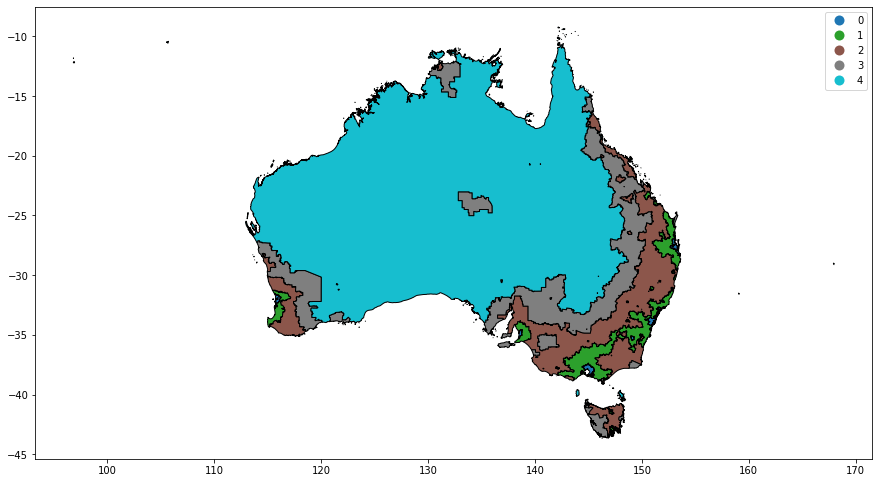

In [8]:
aus.plot(column = 'RA_CAT', categorical=True,legend=True,edgecolor='black',figsize=(15, 15))

In [9]:
## Concatenate the Australia features to the original
ra_with_aus = gpd.GeoDataFrame( pd.concat( [aus, ra_clean], ignore_index=True) )
ra_with_aus

,RA_NAME16,geometry,RA_CODE16,STE_CODE16,STE_NAME16,AREASQKM16,RA_CAT
0,Inner Regional Australia,"MULTIPOLYGON (((147.66558 -42.87001, 147.65329...",101,10,Australia,8.742484e+04,1
1,Major Cities of Australia,"MULTIPOLYGON (((144.42211 -38.08523, 144.43273...",100,10,Australia,5.661639e+03,0
2,Outer Regional Australia,"MULTIPOLYGON (((146.88218 -43.58617, 146.90354...",102,10,Australia,2.985141e+05,2
3,Remote Australia,"MULTIPOLYGON (((146.27499 -43.63712, 146.28641...",103,10,Australia,2.184631e+05,3
4,Very Remote Australia,"MULTIPOLYGON (((148.34350 -40.49831, 148.34701...",104,10,Australia,1.907470e+05,4
5,Major Cities of Australia,"MULTIPOLYGON (((149.06151 -35.15969, 149.11550...",100,1,New South Wales,5.661639e+03,0
6,Inner Regional Australia,"MULTIPOLYGON (((145.56444 -35.64322, 145.55328...",101,1,New South Wales,8.742484e+04,1
7,Outer Regional Australia,"MULTIPOLYGON (((141.71041 -34.09829, 141.71569...",102,1,New South Wales,2.985141e+05,2
8,Remote Australia,"MULTIPOLYGON (((145.92649 -30.08885, 145.92151...",103,1,New South Wales,2.184631e+05,3
9,Very Remote Australia,"MULTIPOLYGON (((159.07611 -31.55778, 159.07286...",104,1,New South Wales,1.907470e+05,4


In [10]:
## Write to geojson
ra_with_aus.to_file("./RA_2016_AUST_all.geojson", driver="GeoJSON")